# Projekt realizowany w ramach przedmiotu Metody Eksploracji Danych, Temat: Analiza Zbioru Danych Aplikacji Z Google Play Store Wraz Ze Stworzeniem Modelu Regresji Oceny i Ceny. 
## Autorzy: Marharyta Kruk, Bartosz Puszkarski

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Wstƒôpna analiza danych

In [2]:
df = pd.read_csv("./dane/googleplaystore.csv")
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

### Z warto≈õci ciƒÖg≈Çych mamy Rating, Reviews, Size oraz Price. 

In [3]:
df.tail()

App             Category  \
10836                               Sya9a Maroc - FR               FAMILY   
10837               Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                         Parkinson Exercices FR              MEDICAL   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres      Last Updated         Current Ver  \
10836       Everyone          Education     July 25, 2017                1.48   
10837       Everyone          Education      July 6, 2018                 1.0   
10838       Everyone            Medical  January 20, 2017                 1.0   
10839     Mature 17+  Books & Reference  January 19, 2015  Varies with device   
10840       Everyone          Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
10836          4.1 and up  
10837          4.1 and up  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Ile pustych element√≥w

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Wniosek: W danym zbiorze danych sƒÖ do≈õƒá du≈ºo rekord√≥w bez oceny, oraz sƒÖ kilka zniszczonych wyraz√≥w. Dalej uda≈Ço siƒô znale≈∫ƒá kilka anomalij w danych, kt√≥re uda≈Ço siƒô wyeliminowaƒá. 

# Analiza cen

## Aplikacje dzielƒÖ siƒô na p≈Çatne i bezp≈Çatne. Czy cena ma wp≈Çyw na wynikowƒÖ ocenƒô? 

In [6]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [7]:
def price_to_number(price):
    if price in ["0", "Everyone"]:
        return 0
    return float(price[1:])

price_number = df.copy()
price_number["Price"] = df["Price"].apply(price_to_number)
print(sorted(price_number["Price"].unique()))


[0.0, 0.99, 1.0, 1.04, 1.2, 1.26, 1.29, 1.49, 1.5, 1.59, 1.61, 1.7, 1.75, 1.76, 1.96, 1.97, 1.99, 2.0, 2.49, 2.5, 2.56, 2.59, 2.6, 2.9, 2.95, 2.99, 3.02, 3.04, 3.08, 3.28, 3.49, 3.61, 3.88, 3.9, 3.95, 3.99, 4.29, 4.49, 4.59, 4.6, 4.77, 4.8, 4.84, 4.85, 4.99, 5.0, 5.49, 5.99, 6.49, 6.99, 7.49, 7.99, 8.49, 8.99, 9.0, 9.99, 10.0, 10.99, 11.99, 12.99, 13.99, 14.0, 14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4, 19.9, 19.99, 24.99, 25.99, 28.99, 29.99, 30.99, 33.99, 37.99, 39.99, 46.99, 74.99, 79.99, 89.99, 109.99, 154.99, 200.0, 299.99, 379.99, 389.99, 394.99, 399.99, 400.0]


## Sprawdzamy p≈Çatne aplikacje

In [8]:
grouped_price = price_number[price_number['Type']=='Paid']

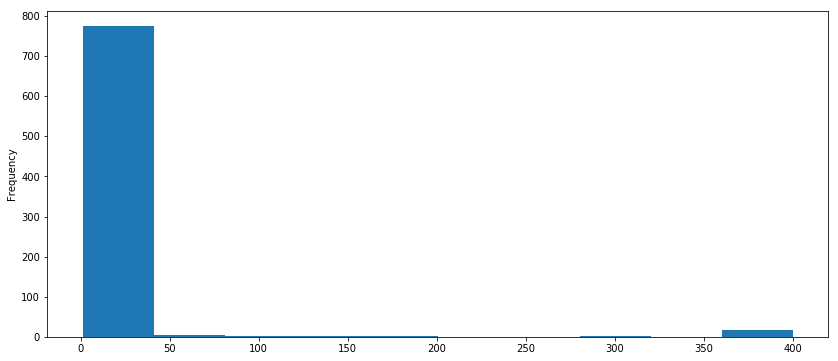

In [9]:
plt.figure(figsize=(14, 6))
grouped_price['Price'].plot.hist()

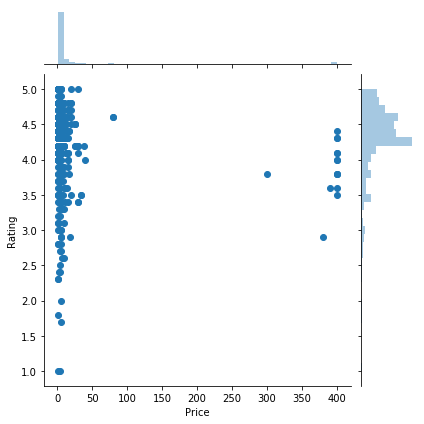

In [10]:
g = sns.jointplot(x="Price", y="Rating", data=grouped_price)

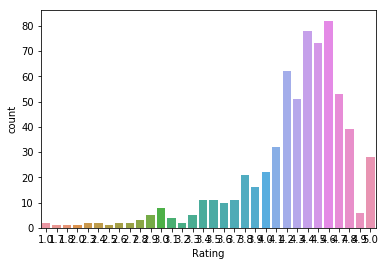

In [11]:
g = sns.countplot(x="Rating",  data=grouped_price)

### Wniosek: Cena wiƒôkszo≈õci aplikacji znajduje siƒô w przedzia≈Çe 1..30 . Rating tych aplikacji nie bardzo zale≈ºy od ceny, lecz drogie aplikacje (300-400) majƒÖ ≈õrednie wysokƒÖ ocenƒô.   

### Najdro≈ºsze aplikacje:

In [12]:
most_expansive = grouped_price[grouped_price['Price']>150]
most_expansive

App      Category  Rating Reviews  Size  \
4197             most expensive app (H)        FAMILY     4.3       6  1.5M   
4362                         üíé I'm rich     LIFESTYLE     3.8     718   26M   
4367           I'm Rich - Trump Edition     LIFESTYLE     3.6     275  7.3M   
5351                          I am rich     LIFESTYLE     3.8    3547  1.8M   
5354                     I am Rich Plus        FAMILY     4.0     856  8.7M   
5355                      I am rich VIP     LIFESTYLE     3.8     411  2.6M   
5356                  I Am Rich Premium       FINANCE     4.1    1867  4.7M   
5357                I am extremely Rich     LIFESTYLE     2.9      41  2.9M   
5358                         I am Rich!       FINANCE     3.8      93   22M   
5359                 I am rich(premium)       FINANCE     3.5     472  965k   
5362                      I Am Rich Pro        FAMILY     4.4     201  2.7M   
5364     I am rich (Most expensive app)       FINANCE     4.1     129  2.7M   
5366                          I Am Rich        FAMILY     3.6     217  4.9M   
5369                          I am Rich       FINANCE     4.3     180  3.8M   
5373                 I AM RICH PRO PLUS       FINANCE     4.0      36   41M   
6692                      cronometra-br  PRODUCTIVITY     NaN       0  5.4M   
9719                       EP Cook Book       MEDICAL     NaN       0  3.2M   
9917                        Eu Sou Rico       FINANCE     NaN       0  1.4M   
9934  I'm Rich/Eu sou Rico/ÿ£ŸÜÿß ÿ∫ŸÜŸä/ÊàëÂæàÊúâÈå¢     LIFESTYLE     NaN       0   40M   

      Installs  Type   Price Content Rating         Genres       Last Updated  \
4197      100+  Paid  399.99       Everyone  Entertainment      July 16, 2018   
4362   10,000+  Paid  399.99       Everyone      Lifestyle     March 11, 2018   
4367   10,000+  Paid  400.00       Everyone      Lifestyle        May 3, 2018   
5351  100,000+  Paid  399.99       Everyone      Lifestyle   January 12, 2018   
5354   10,000+  Paid  399.99       Everyone  Entertainment       May 19, 2018   
5355   10,000+  Paid  299.99       Everyone      Lifestyle      July 21, 2018   
5356   50,000+  Paid  399.99       Everyone        Finance  November 12, 2017   
5357    1,000+  Paid  379.99       Everyone      Lifestyle       July 1, 2018   
5358    1,000+  Paid  399.99       Everyone        Finance  December 11, 2017   
5359    5,000+  Paid  399.99       Everyone        Finance        May 1, 2017   
5362    5,000+  Paid  399.99       Everyone  Entertainment       May 30, 2017   
5364    1,000+  Paid  399.99           Teen        Finance   December 6, 2017   
5366   10,000+  Paid  389.99       Everyone  Entertainment      June 22, 2018   
5369    5,000+  Paid  399.99       Everyone        Finance     March 22, 2018   
5373    1,000+  Paid  399.99       Everyone        Finance      June 25, 2018   
6692        0+  Paid  154.99       Everyone   Productivity  November 24, 2017   
9719        0+  Paid  200.00       Everyone        Medical      July 26, 2015   
9917        0+  Paid  394.99       Everyone        Finance      July 11, 2018   
9934        0+  Paid  399.99       Everyone      Lifestyle   December 1, 2017   

     Current Ver   Android Ver  
4197         1.0    7.0 and up  
4362       1.0.0    4.4 and up  
4367       1.0.1    4.1 and up  
5351         2.0  4.0.3 and up  
5354         3.0    4.4 and up  
5355       1.1.1    4.3 and up  
5356         1.6    4.0 and up  
5357         1.0    4.0 and up  
5358         1.0    4.1 and up  
5359         3.4    4.4 and up  
5362        1.54    1.6 and up  
5364           2  4.0.3 and up  
5366         1.5    4.2 and up  
5369         1.0    4.2 and up  
5373       1.0.2    4.1 and up  
6692       1.0.0    4.1 and up  
9719         1.0    3.0 and up  
9917         1.0  4.0.3 and up  
9934       MONEY    4.1 and up

<Figure size 1080x720 with 0 Axes>

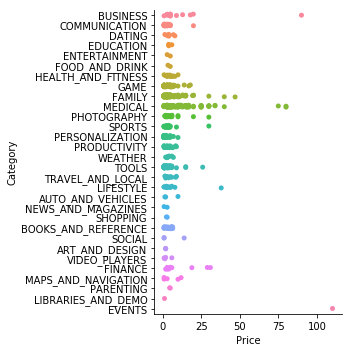

In [13]:
plt.figure(figsize=(15, 10))
grouped_price = grouped_price[grouped_price['Price']<150]
g = sns.catplot(x="Price", y="Category", data=grouped_price)

### Wniosek: najdro≈ºsze aplikacje sƒÖ w kategoriach Lifestyle, Finance, Medical, Family, sƒÖ kilka wyjƒÖtk√≥w w Events, Business. Reszta jest mniej od 30.  Og√≥lnie w r√≥≈ºnych kategoriach sƒÖ warto≈õci odstajƒÖce, kilka aplikacji sƒÖ dro≈ºsze. 

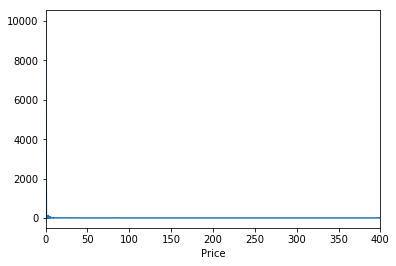

In [14]:
grouped_price = price_number.groupby("Price").count()
grouped_price["App"].index
grouped_price["App"].plot()


#### Jak widaƒá nie ma za wiele drogich aplikacji

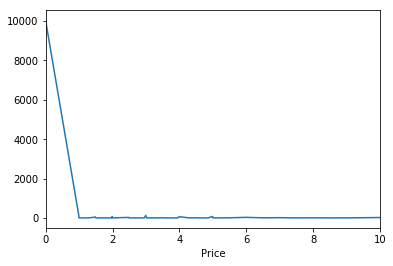

In [15]:
grouped_price.drop([10.99, 11.99, 12.99, 13.99, 14.0, 14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4, 19.9, 19.99, 24.99, 25.99, 28.99, 29.99, 30.99, 33.99, 37.99, 39.99, 46.99, 74.99, 79.99, 89.99, 109.99, 154.99, 200.0, 299.99, 379.99, 389.99, 394.99, 399.99, 400.0])["App"].plot()

In [16]:
total = grouped_price["App"].sum()
less_than_one_and_a_half = grouped_price["App"].loc[0:1.5].sum()
print("Aplikacje o cenie < 1.5 $ stanowiƒÖ", less_than_one_and_a_half / total, "% ca≈Ço≈õci")

Aplikacje o cenie < 1.5 $ stanowiƒÖ 0.9448390369892077 % ca≈Ço≈õci


### Wniosek: aplikacje o cenie < 1.5 stanowiƒÖ wiekszo≈õƒá wszystkich p≈Çatnych aplikacji. 

### Jaki jest rozk≈Çad ocen dla aplikacji bezp≈Çatnych? 

In [17]:
grouped_price = price_number[price_number['Type']=='Free']

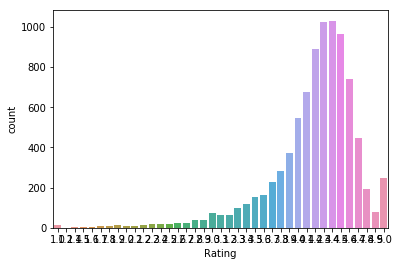

In [18]:
g = sns.countplot(x="Rating",  data=grouped_price)

### Wnioski: typ aplikacji ma ma≈Çy wp≈Çyw na wynikowƒÖ ocenƒô. Cena te≈º ma ma≈Çy wp≈Çyw, jednak ≈ºe bardzo drogie apliakcje (>300) majƒÖ ≈õrednio wysokƒÖ ocenƒô. 

# Analiza Rating

### Wstƒôpna analiza ratingu

In [19]:
df["Rating"].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

#### W tej kolumnie sƒÖ du≈ºo warto≈õci pustych. 

In [20]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

#### Wyrzucamy anomaliƒô

In [21]:
anomaly = df["Rating"] == 19.0
df[anomaly]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [22]:
i = df[df['Category'] == '1.9'].index
df.loc[i]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [23]:
df = df.drop(i)

In [24]:
df.describe()

Rating
count  9366.000000
mean      4.191757
std       0.515219
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max       5.000000

In [25]:
df["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

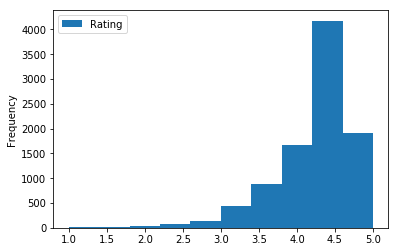

In [26]:
df.plot.hist(by="Rating")

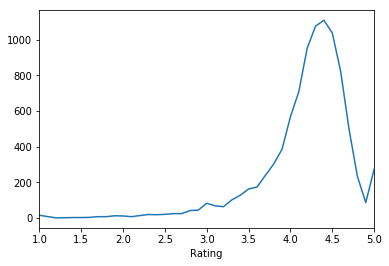

In [27]:
counted_ratings = df.groupby("Rating").count()["App"]
counted_ratings.plot()

In [28]:
wrongs = 0
for i in df["Rating"].unique():
    try: 
        int(i)
    except ValueError:
        wrongs += 1
        print("Warto≈õƒá nie jest liczbƒÖ: ", i)
        
print("Kolumna zawiera: ", wrongs, " warto≈õci, kt√≥re nie sƒÖ liczbami.")

Warto≈õƒá nie jest liczbƒÖ:  nan
Kolumna zawiera:  1  warto≈õci, kt√≥re nie sƒÖ liczbami.


### Wniosek: wiƒôkszo≈õƒá aplikacji jest dobrze oceniana (w ramach 4.0-4.5)

# Analiza Reviews

In [29]:
wrongs = 0
for i in df["Reviews"].unique():
    try: 
        int(i)
    except ValueError:
        wrongs += 1
        print("Warto≈õƒá nie jest liczbƒÖ: ", i)
        
print("Kolumna zawiera: ", wrongs, " warto≈õci, kt√≥re nie sƒÖ liczbami.")

Kolumna zawiera:  0  warto≈õci, kt√≥re nie sƒÖ liczbami.


In [30]:
df['Reviews'] = df['Reviews'].apply(lambda x : int(x))

In [31]:
df['Reviews'].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

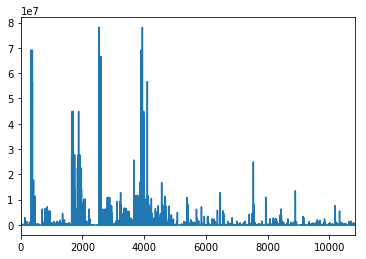

In [32]:
df['Reviews'].plot()

#### Najmniejsza warto≈õƒá: 0, Najwiƒôksza: 78.158.310

# Installs

### Wstƒôpna analiza: jakie warto≈õci mamy

In [33]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

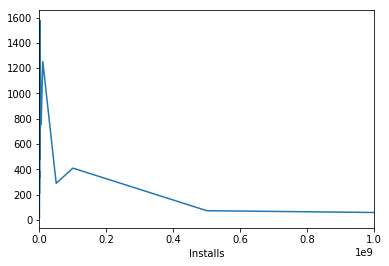

In [34]:
def installs_to_int(install):
    if install in ["0", "0+", "Free"]:
        return 0
    install = install.replace(",", "")[:-1]
    return int(install)


with_installs_as_integers = df.copy()
with_installs_as_integers["Installs"] = df["Installs"].apply(installs_to_int)

counted = with_installs_as_integers.groupby("Installs").count()
counted["App"].plot()

In [35]:
with_installs_as_integers.describe()

Rating       Reviews      Installs
count  9366.000000  1.084000e+04  1.084000e+04
mean      4.191757  4.441529e+05  1.546434e+07
std       0.515219  2.927761e+06  8.502936e+07
min       1.000000  0.000000e+00  0.000000e+00
25%       4.000000  3.800000e+01  1.000000e+03
50%       4.300000  2.094000e+03  1.000000e+05
75%       4.500000  5.477550e+04  5.000000e+06
max       5.000000  7.815831e+07  1.000000e+09

Obciƒôcie skrajnie najwiƒôkszych warto≈õci


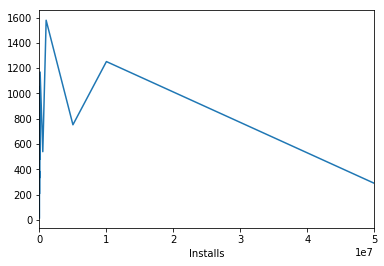

In [36]:
print("Obciƒôcie skrajnie najwiƒôkszych warto≈õci")
counted["App"][:-3].plot()


### Jakie aplikacje instalujƒÖ siƒô wiƒôcej? 

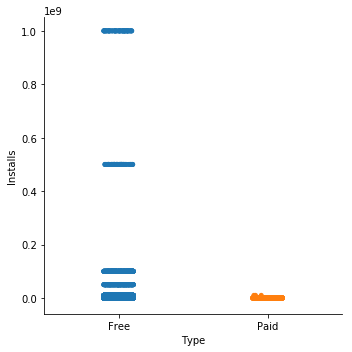

In [37]:
g = sns.catplot(x = 'Type', y = 'Installs', data=with_installs_as_integers)

### Wniosek: P≈Çatne aplikacje instalujƒÖ znacznie rzadziej ni≈º bezp≈Çatne.

### Jak sƒÖ zwiƒÖzane oceny oraz ilo≈õƒá instalacji? 

In [38]:
sns.set(rc={'figure.figsize':(18.7,8.27)})

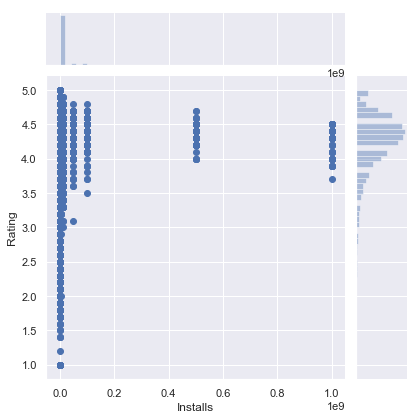

In [39]:
g = sns.jointplot(y='Rating', x='Installs', data=with_installs_as_integers)

In [40]:
with_installs_as_integers2 = with_installs_as_integers[with_installs_as_integers['Installs'] < 50000000]

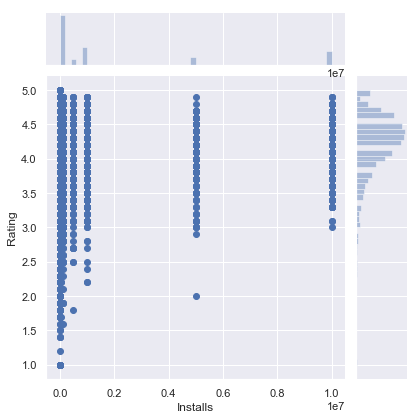

In [41]:
g = sns.jointplot(y='Rating', x='Installs', data=with_installs_as_integers2)

### Wniosek: Ma≈Ça liczba instalacji nie ma wp≈Çywu na ocenƒô, jednak du≈ºa liczba (od 5mln) oznacza do≈õƒá wysokƒÖ ocenƒô. 

## Wersji

### Analiza wstƒôpna (jakie warto≈õci, jaki rozk≈Çad)

In [42]:
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

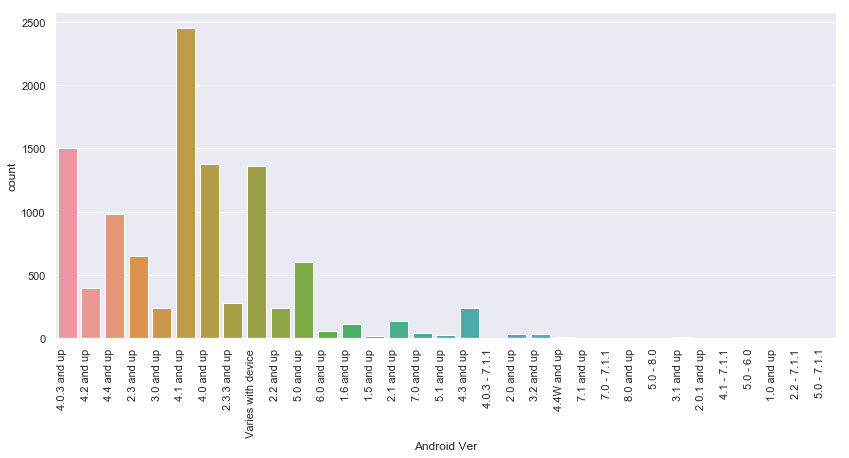

In [43]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='Android Ver', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

### Aplikacje dla kt√≥rych wersji androida majƒÖ najwiƒôksze oceny? 

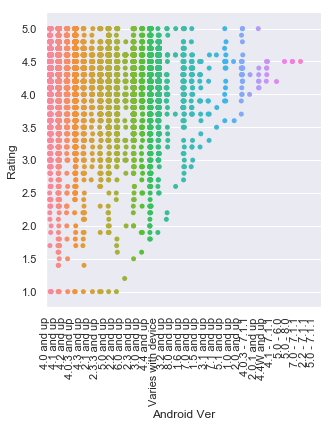

In [44]:
categories_sorted = df.sort_values(by='Rating')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Android Ver', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

### Jak widaƒá z wykresu, sƒÖ kilka wersji andorida, dla kt√≥rych charakterystyczne sƒÖ wysokie oceny.

## Rating kontentu

### Analiza wstepna

In [45]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

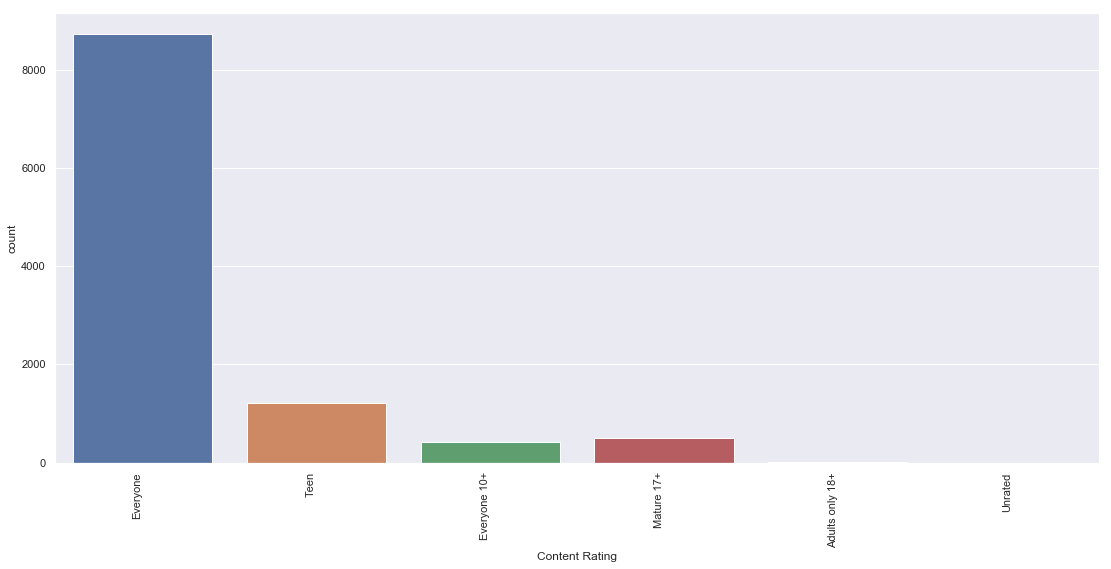

In [46]:
g = sns.countplot(x='Content Rating', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

### Kt√≥ry Rating kt√≥re aplikacje majƒÖ

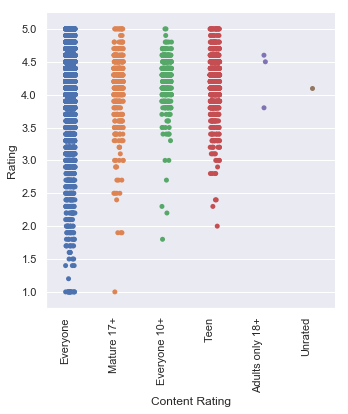

In [47]:
categories_sorted = df.sort_values(by='Rating')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Content Rating', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

In [48]:
df[df['Content Rating'] == 'Unrated']

App Category  Rating  Reviews  Size Installs  Type  \
7312     Best CG Photography   FAMILY     NaN        1  2.5M     500+  Free   
8266  DC Universe Online Map    TOOLS     4.1     1186  6.4M  50,000+  Free   

     Price Content Rating         Genres       Last Updated Current Ver  \
7312     0        Unrated  Entertainment      June 24, 2015         5.2   
8266     0        Unrated          Tools  February 27, 2012         1.3   

       Android Ver  
7312    3.0 and up  
8266  2.3.3 and up

### Aplikacje typu "Adults only" sƒÖ wysoko oceniane. Najni≈ºsze oceny sƒÖ tylko w aplikacjach typu "Everyone" i "Mature 17+". 

## Rodzaje aplikacji

In [49]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

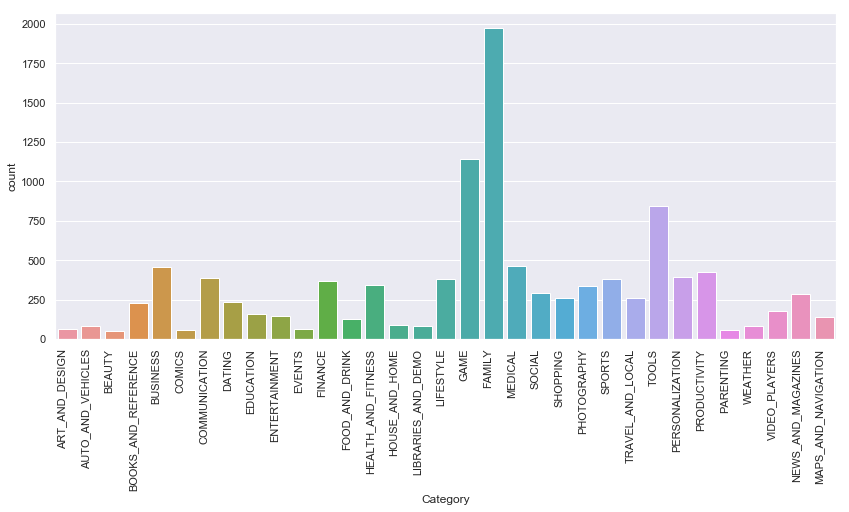

In [50]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='Category', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

### Wniosek: najwiƒôksza ilo≈õƒá aplikacji sƒÖ w kategoriach Game i Family

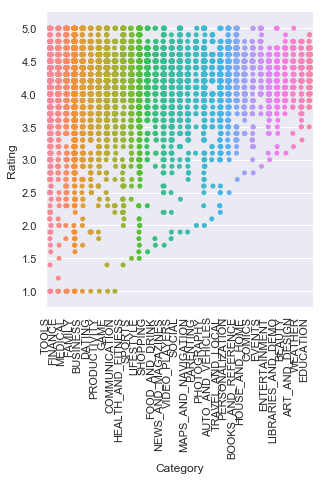

In [51]:
categories_sorted = df.sort_values(by='Rating')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Category', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

### Jak widaƒá z wykresu, sƒÖ kilka rodzaj√≥w, dla kt√≥rych charakterystyczne wysokie oceny. Bardzo niskie oceny te≈º wystƒôpujƒÖ tylko w pewnych kategoriach. 

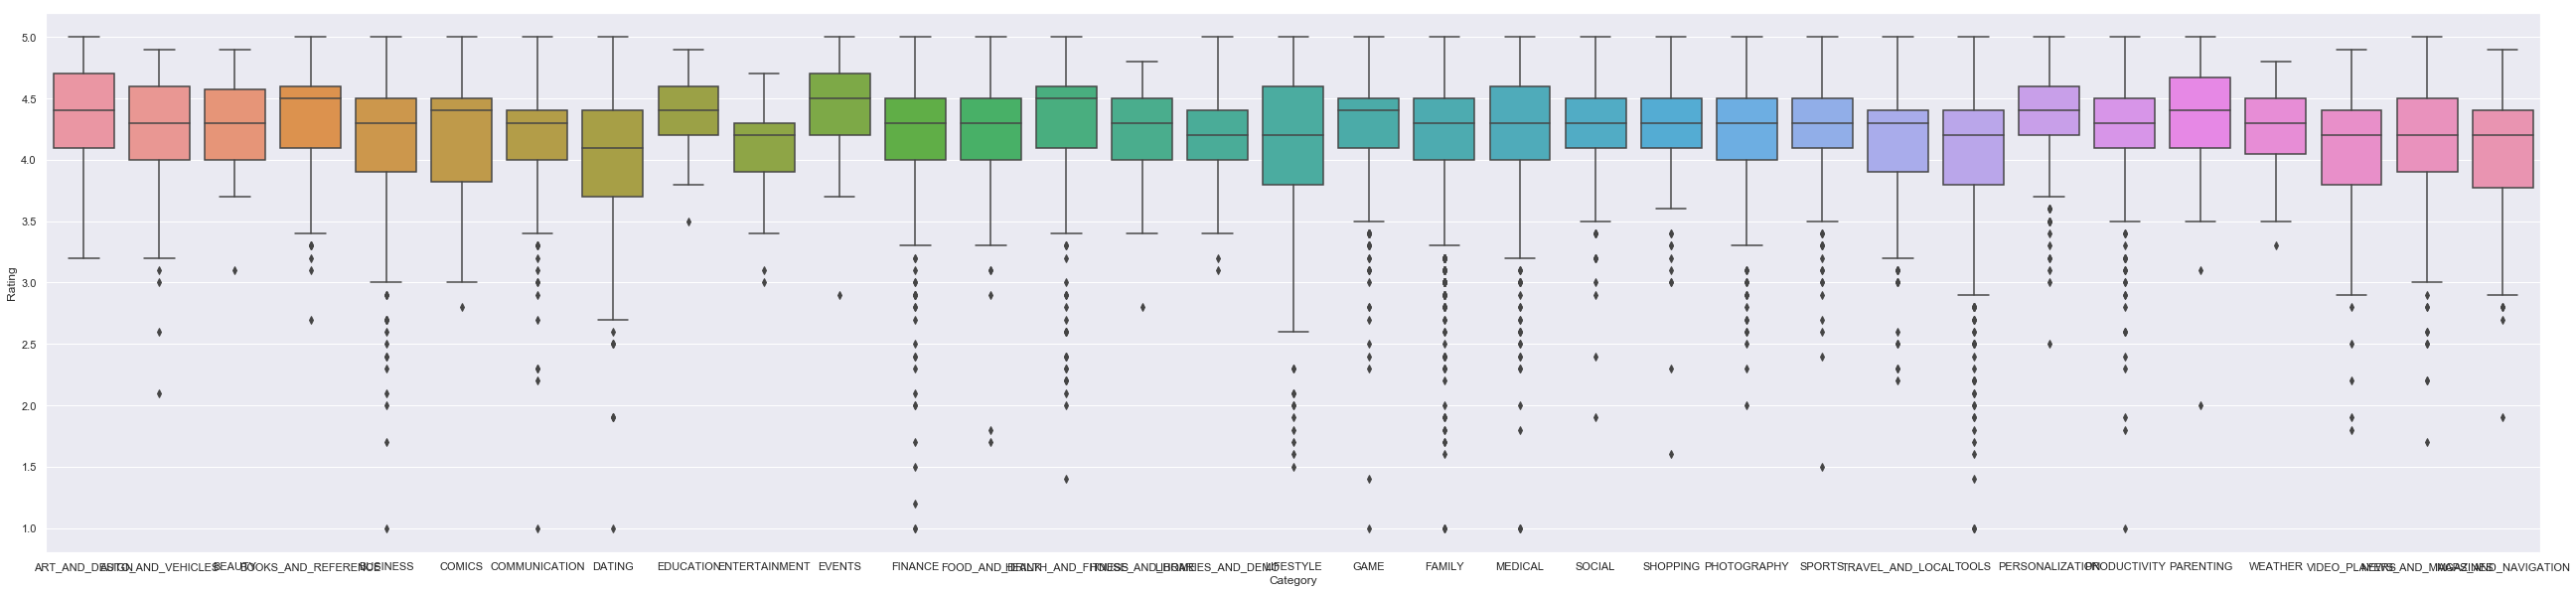

In [52]:
plt.figure(figsize=(45,10))
ax = sns.boxplot(x="Category", y="Rating", data=df)

### Boxploty pokazujƒÖ nam, ≈ºe z wyjƒÖtkiem kilku warto≈õci odstajƒÖcych w pewnym kategoriach, dla aplikacji jest charakterystyczna wysoka ocena. 

## Gatunki

In [53]:
df['Genres'].value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

### Gatunki majƒÖ za du≈ºo warto≈õci unikatowych dla dobrej wizualizacji, wiƒôc na razie nie mo≈ºemy stwierdziƒá, jaki wp≈Çyw oni majƒÖ na inne cechy. 

#  Wnioski dotyczƒÖce przygotowania danych:
- Mamy 9367 niepustych obiekt√≥w w interesujƒÖcej nas kolumnie **Rating**, warto≈õci docelowo powinny wahaƒá siƒô w przedziale 1.0 -5.0, ale znajduje siƒô jedna warto≈õƒá 19.0. Z analizy kwantyli wynika, ≈ºe ponad **75%** wszystkich istniejƒÖcych **Rating√≥w** ma warto≈õƒá **r√≥wnƒÖ bƒÖd≈∫ wy≈ºszƒÖ 4.0**, bezpiecznym jest zatem stwierdzenie, ≈ºe mo≈ºemy zastƒÖpiƒá brakujƒÖce warto≈õci warto≈õciƒÖ r√≥wnƒÖ medianie ( 4.30 ).

- Kolumna **Type** zawiera jedynie informacjƒô czy aplikacja jest p≈Çatna, czy darmowa - mo≈ºna zastƒÖpiƒá binarnƒÖ reprezentacjƒÖ. P≈Çatnych aplikacji jest znacznie mniej ni≈º bezp≈Çatnych.

- Wszystkie rekordy majƒÖ warto≈õƒá w kolumnie **Price**, jest to jednak obecnie napis - zawiera symbol dolara plus warto≈õƒá liczbowƒÖ, znajduje siƒô tak≈ºe etykieta Everyone. Wszystkie warto≈õci mo≈ºemy zastƒÖpiƒá zwyk≈ÇƒÖ warto≈õciƒÖ liczbowƒÖ pozbywajƒÖc siƒô symbolu waluty, a warto≈õƒá Everyone zastƒÖpiƒá zerem.

- Kolumna **Installs** zawiera warto≈õci kategoryczne, nie ciƒÖg≈Çe - mo≈ºe zostaƒá zastƒÖpiona warto≈õciami liczbowymi bez wiƒôkszego enkodowania bo jest kategoryczna porzƒÖdkowa.

- Kolumnƒô **AndroidVer** bezpieczniej jest enkodowaƒá. SƒÖ w niej kilka kategorii, kt√≥re majƒÖ wp≈Çyw na wynikowƒÖ ocenƒô.

- Kolumnƒô **Genres** te≈º enkodujemy

- Kolumna **Size** zawiera warto≈õci ciƒÖgle, ale z symbolami typu "M", "kb", wiƒôc przekszta≈Çcamy ich na normalne warto≈õci.


- Kolumny **Last Update**, **Current Ver** liczymy za zbyt subiektywne, wiƒôc nie uwzglƒôdniamy w analizie. 

## Przygotowanie danych

In [54]:
import re
import sys

import time
import datetime

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


In [55]:
playstore_df = pd.read_csv("./dane/googleplaystore.csv")

In [56]:
playstore_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

Stworzenie osobnej tablicy z danymi, nie posiadajƒÖcymi rating

In [57]:
without_rating = df[df['Rating'].isnull()]
without_rating.head()

App        Category  Rating  Reviews  \
23                Mcqueen Coloring pages  ART_AND_DESIGN     NaN       61   
113            Wrinkles and rejuvenation          BEAUTY     NaN      182   
123               Manicure - nail design          BEAUTY     NaN      119   
126         Skin Care and Natural Beauty          BEAUTY     NaN      654   
129  Secrets of beauty, youth and health          BEAUTY     NaN       77   

     Size  Installs  Type Price Content Rating  \
23   7.0M  100,000+  Free     0       Everyone   
113  5.7M  100,000+  Free     0   Everyone 10+   
123  3.7M   50,000+  Free     0       Everyone   
126  7.4M  100,000+  Free     0           Teen   
129  2.9M   10,000+  Free     0     Mature 17+   

                              Genres        Last Updated Current Ver  \
23   Art & Design;Action & Adventure       March 7, 2018       1.0.0   
113                           Beauty  September 20, 2017         8.0   
123                           Beauty       July 23, 2018         1.3   
126                           Beauty       July 17, 2018        1.15   
129                           Beauty      August 8, 2017         2.0   

    Android Ver  
23   4.1 and up  
113  3.0 and up  
123  4.1 and up  
126  4.1 and up  
129  2.3 and up

### ZastƒÖpienie niepasujƒÖcych warto≈õci Ratings medianƒÖ

In [58]:
playstore_df['Rating'] = playstore_df['Rating'].fillna(playstore_df['Rating'].median())

### Wyrzucenie anomalii z Category oraz zmiana warto≈õci None w pozosta≈Çuch kolumnach

In [59]:
i = playstore_df[playstore_df['Category'] == '1.9'].index
playstore_df.loc[i]
playstore_df = playstore_df.drop(i)
playstore_df = playstore_df[pd.notnull(playstore_df['Last Updated'])]
playstore_df = playstore_df[pd.notnull(playstore_df['Content Rating'])]
playstore_df = playstore_df[pd.notnull(playstore_df['Android Ver'])]

### Encodowanie Category

In [60]:
category_list = playstore_df['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
playstore_df = pd.concat([playstore_df, pd.get_dummies(playstore_df['Category'], prefix='cat')], axis=1)

### Encodowanie Genres

In [61]:
le = LabelEncoder()
playstore_df['Genres'] = le.fit_transform(playstore_df['Genres'])

### Encodowanie Android Ver

In [62]:
le = LabelEncoder()
playstore_df['Android Ver'] = le.fit_transform(playstore_df['Android Ver'])

### Encodowanie Content Rating: 0 - Adults Only, 1 - Everyone, 2 - Everyone 10+, 3 - Mature 17+, 4 - Teen, 5 - Unrated

In [63]:
le = LabelEncoder()
playstore_df['Content Rating'] = le.fit_transform(playstore_df['Content Rating'])

### Zmiana Price

In [64]:
playstore_df['Price'] = playstore_df['Price'].apply(lambda x : x.strip('$'))

### Zmiana Installs

In [65]:
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

### Encodowanie Type: 1 - Bezp≈Çatna, 0 - P≈Çatna

In [66]:
playstore_df['Type'] = pd.get_dummies(playstore_df['Type'])

### Zmiana size, przekszta≈Çcenie kb na mb

In [67]:
k_indices = playstore_df['Size'].loc[playstore_df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(playstore_df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
playstore_df.loc[k_indices,'Size'] = converter
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: x.strip('M'))

playstore_df.loc[(playstore_df.Size == 'Varies with device'), 'Size'] = np.nan

playstore_df['Size'] = playstore_df['Size'].astype(float)
playstore_df['Size'] = playstore_df['Size'].fillna((playstore_df['Size'].mean()))

### Wyniki

In [68]:
playstore_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size  Installs  Type Price  Content Rating  Genres  ...  \
0     159  19.0     10000     1     0               1       9  ...   
1     967  14.0    500000     1     0               1      12  ...   
2   87510   8.7   5000000     1     0               1       9  ...   
3  215644  25.0  50000000     1     0               4       9  ...   
4     967   2.8    100000     1     0               1      11  ...   

  cat_PERSONALIZATION cat_PHOTOGRAPHY  cat_PRODUCTIVITY  cat_SHOPPING  \
0                   0               0                 0             0   
1                   0               0                 0             0   
2                   0               0                 0             0   
3                   0               0                 0             0   
4                   0               0                 0             0   

   cat_SOCIAL  cat_SPORTS  cat_TOOLS  cat_TRAVEL_AND_LOCAL  cat_VIDEO_PLAYERS  \
0           0           0          0                     0                  0   
1           0           0          0                     0                  0   
2           0           0          0                     0                  0   
3           0           0          0                     0                  0   
4           0           0          0                     0                  0   

   cat_WEATHER  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 46 columns]

In [69]:
playstore_df.describe()

Rating          Size          Type  Content Rating        Genres  \
count  10838.000000  10838.000000  10838.000000    10838.000000  10838.000000   
mean       4.206431     21.519439      0.926186        1.465123     64.261211   
std        0.480374     20.748634      0.261481        1.006224     32.649036   
min        1.000000      0.008000      0.000000        0.000000      0.000000   
25%        4.100000      5.900000      1.000000        1.000000     38.000000   
50%        4.300000     18.000000      1.000000        1.000000     67.000000   
75%        4.500000     26.000000      1.000000        1.000000     96.000000   
max        5.000000    100.000000      1.000000        5.000000    118.000000   

        Android Ver  cat_ART_AND_DESIGN  cat_AUTO_AND_VEHICLES    cat_BEAUTY  \
count  10838.000000        10838.000000           10838.000000  10838.000000   
mean      17.492803            0.005997               0.007843      0.004890   
std        7.211416            0.077214               0.088216      0.069762   
min        0.000000            0.000000               0.000000      0.000000   
25%       13.000000            0.000000               0.000000      0.000000   
50%       17.000000            0.000000               0.000000      0.000000   
75%       20.000000            0.000000               0.000000      0.000000   
max       32.000000            1.000000               1.000000      1.000000   

       cat_BOOKS_AND_REFERENCE  ...  cat_PERSONALIZATION  cat_PHOTOGRAPHY  \
count             10838.000000  ...         10838.000000     10838.000000   
mean                  0.021314  ...             0.035984         0.030910   
std                   0.144435  ...             0.186260         0.173081   
min                   0.000000  ...             0.000000         0.000000   
25%                   0.000000  ...             0.000000         0.000000   
50%                   0.000000  ...             0.000000         0.000000   
75%                   0.000000  ...             0.000000         0.000000   
max                   1.000000  ...             1.000000         1.000000   

       cat_PRODUCTIVITY  cat_SHOPPING    cat_SOCIAL    cat_SPORTS  \
count      10838.000000  10838.000000  10838.000000  10838.000000   
mean           0.039122      0.023990      0.027219      0.035431   
std            0.193893      0.153024      0.162729      0.184875   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.000000      0.000000      0.000000   
50%            0.000000      0.000000      0.000000      0.000000   
75%            0.000000      0.000000      0.000000      0.000000   
max            1.000000      1.000000      1.000000      1.000000   

          cat_TOOLS  cat_TRAVEL_AND_LOCAL  cat_VIDEO_PLAYERS   cat_WEATHER  
count  10838.000000          10838.000000       10838.000000  10838.000000  
mean       0.077782              0.023805           0.016147      0.007566  
std        0.267840              0.152449           0.126046      0.086657  
min        0.000000              0.000000           0.000000      0.000000  
25%        0.000000              0.000000           0.000000      0.000000  
50%        0.000000              0.000000           0.000000      0.000000  
75%        0.000000              0.000000           0.000000      0.000000  
max        1.000000              1.000000           1.000000      1.000000  

[8 rows x 39 columns]

In [70]:
playstore_df.isnull().sum()

App                        0
Category                   0
Rating                     0
Reviews                    0
Size                       0
Installs                   0
Type                       0
Price                      0
Content Rating             0
Genres                     0
Last Updated               0
Current Ver                8
Android Ver                0
cat_ART_AND_DESIGN         0
cat_AUTO_AND_VEHICLES      0
cat_BEAUTY                 0
cat_BOOKS_AND_REFERENCE    0
cat_BUSINESS               0
cat_COMICS                 0
cat_COMMUNICATION          0
cat_DATING                 0
cat_EDUCATION              0
cat_ENTERTAINMENT          0
cat_EVENTS                 0
cat_FAMILY                 0
cat_FINANCE                0
cat_FOOD_AND_DRINK         0
cat_GAME                   0
cat_HEALTH_AND_FITNESS     0
cat_HOUSE_AND_HOME         0
cat_LIBRARIES_AND_DEMO     0
cat_LIFESTYLE              0
cat_MAPS_AND_NAVIGATION    0
cat_MEDICAL                0
cat_NEWS_AND_M

## Analiza danych przekszta≈Çconych

### Badanie wyczyszczonego Size

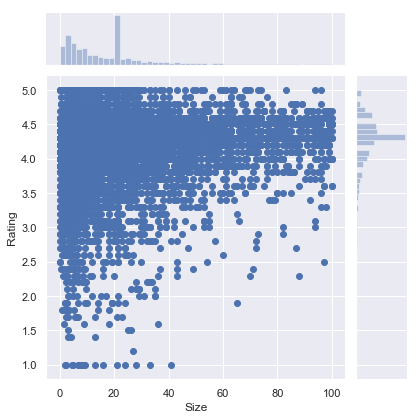

In [71]:
sns.jointplot(x='Size', y='Rating', data=playstore_df)

In [72]:
heavy = playstore_df[playstore_df['Size'] > 95]

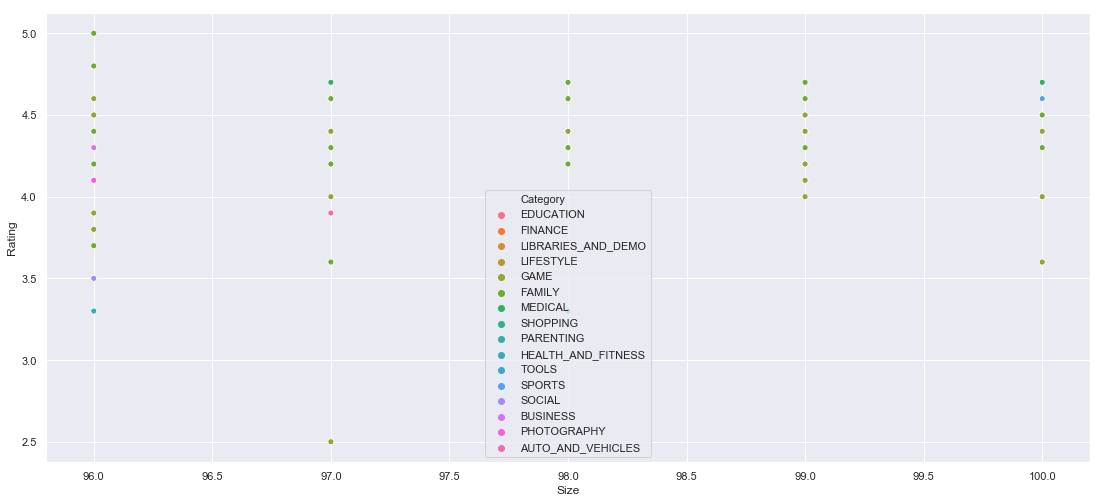

In [73]:
sns.scatterplot(x=heavy['Size'], y=heavy['Rating'], hue=heavy['Category'])

### Wniosek: wiƒôkszo≈õƒá najlepiej ocenianych aplikacji zajmuje mniej 30 MB pamiƒôci. Bardzo du≈ºe aplikacjƒô og√≥lnie majƒÖ dobre oceny. "Ciƒô≈ºkie" aplikacje zwykle przedstawiajƒÖ sobƒÖ aplikajce typu "Games" oraz "Family"

### Standaryzacja

In [74]:
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'cat_ART_AND_DESIGN', 'cat_AUTO_AND_VEHICLES',
       'cat_BEAUTY', 'cat_BOOKS_AND_REFERENCE', 'cat_BUSINESS', 'cat_COMICS',
       'cat_COMMUNICATION', 'cat_DATING', 'cat_EDUCATION', 'cat_ENTERTAINMENT',
       'cat_EVENTS', 'cat_FAMILY', 'cat_FINANCE', 'cat_FOOD_AND_DRINK',
       'cat_GAME', 'cat_HEALTH_AND_FITNESS', 'cat_HOUSE_AND_HOME',
       'cat_LIBRARIES_AND_DEMO', 'cat_LIFESTYLE', 'cat_MAPS_AND_NAVIGATION',
       'cat_MEDICAL', 'cat_NEWS_AND_MAGAZINES', 'cat_PARENTING',
       'cat_PERSONALIZATION', 'cat_PHOTOGRAPHY', 'cat_PRODUCTIVITY',
       'cat_SHOPPING', 'cat_SOCIAL', 'cat_SPORTS', 'cat_TOOLS',
       'cat_TRAVEL_AND_LOCAL', 'cat_VIDEO_PLAYERS', 'cat_WEATHER'],
      dtype='object')

In [75]:
features = ['Reviews', 'Size', 'Installs', 'Price', 'Rating' ]
min_max_scaler = MinMaxScaler()
column_names_to_normalize = features
stand_df = playstore_df.copy()
x = stand_df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = stand_df.index)
stand_df[column_names_to_normalize] = df_temp

C:\Users\strai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [76]:
stand_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   0.775   
1                                Coloring book moana  ART_AND_DESIGN   0.725   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   0.925   
3                              Sketch - Draw & Paint  ART_AND_DESIGN   0.875   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   0.825   

    Reviews      Size  Installs  Type  Price  Content Rating  Genres  ...  \
0  0.000002  0.189935   0.00001     1    0.0               1       9  ...   
1  0.000012  0.139931   0.00050     1    0.0               1      12  ...   
2  0.001120  0.086927   0.00500     1    0.0               1       9  ...   
3  0.002759  0.249940   0.05000     1    0.0               4       9  ...   
4  0.000012  0.027922   0.00010     1    0.0               1      11  ...   

  cat_PERSONALIZATION cat_PHOTOGRAPHY  cat_PRODUCTIVITY  cat_SHOPPING  \
0                   0               0                 0             0   
1                   0               0                 0             0   
2                   0               0                 0             0   
3                   0               0                 0             0   
4                   0               0                 0             0   

   cat_SOCIAL  cat_SPORTS  cat_TOOLS  cat_TRAVEL_AND_LOCAL  cat_VIDEO_PLAYERS  \
0           0           0          0                     0                  0   
1           0           0          0                     0                  0   
2           0           0          0                     0                  0   
3           0           0          0                     0                  0   
4           0           0          0                     0                  0   

   cat_WEATHER  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 46 columns]

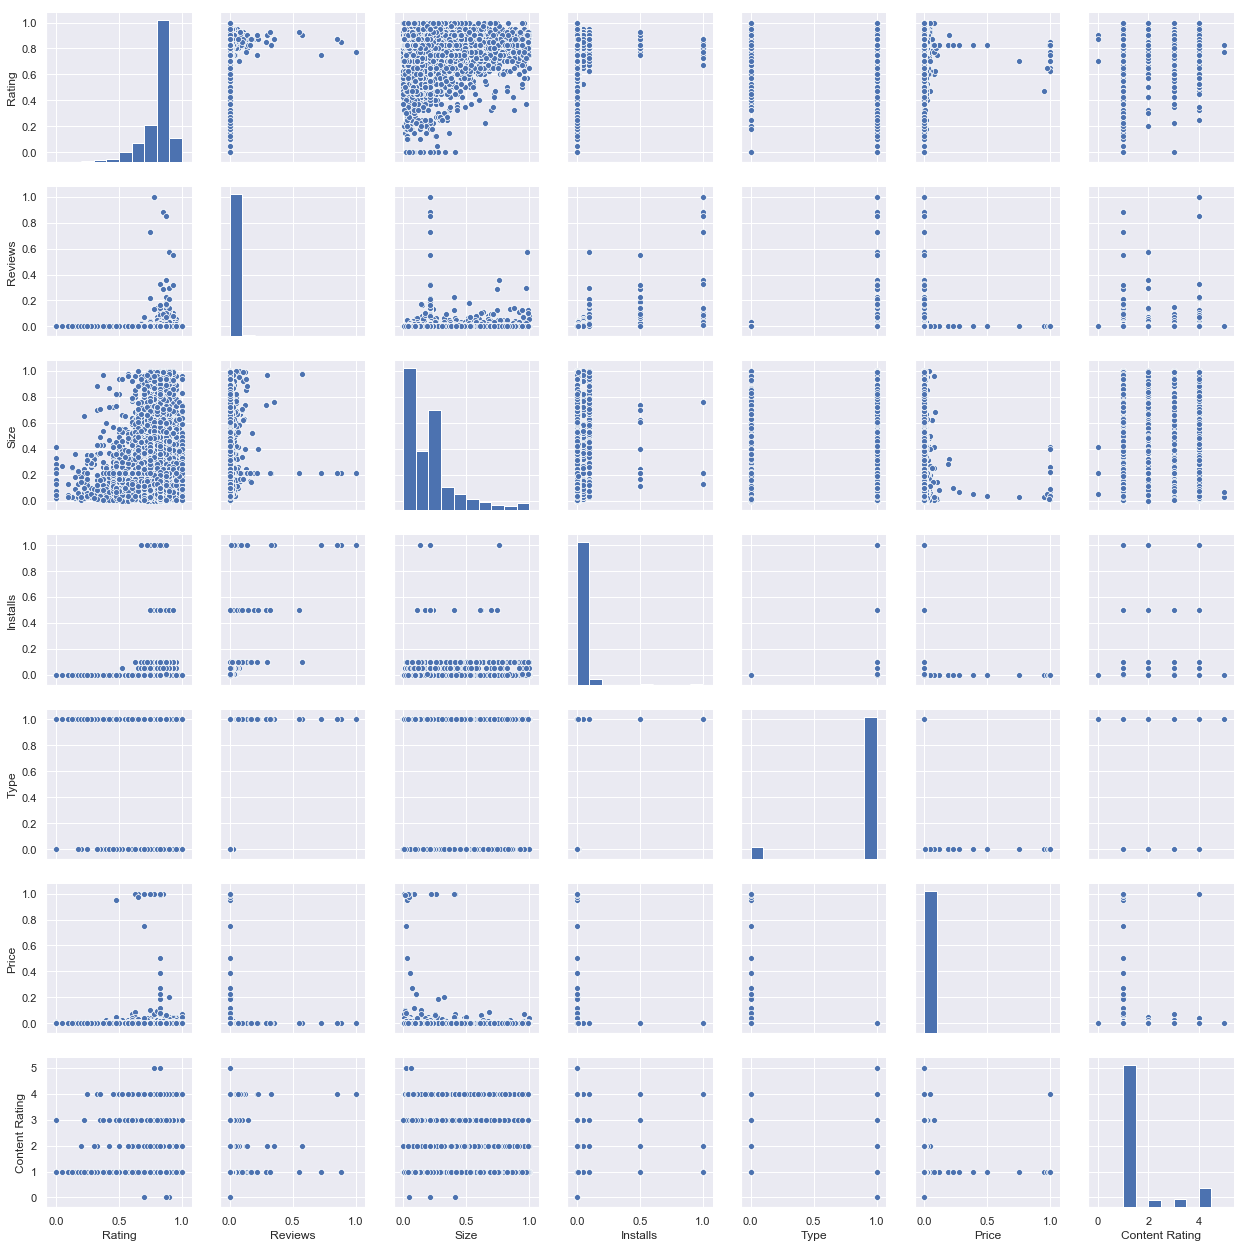

In [77]:
columns = ['Rating','Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Last Updated']
sns.pairplot(stand_df[columns])

### Wnioski: 
- drogie aplikacje zajmujƒÖ ma≈Ço miejsca.
- aplikacje typu Adults Only, Unrated sƒÖ rzadko instalowane + tylko bezp≈Çatne.
- aplikacje typu Everyone, Tenn sƒÖ najdro≈ºsze.

- aplikacje o niskiej ocenie majƒÖ ma≈ÇƒÖ ilo≈õƒá opinii.
- najwiƒôkszƒÖ liczbƒô opinii majƒÖ aplikacje, kt√≥re sƒÖ najczƒô≈õciej instalowane.
- najwiƒôkszƒÖ liczbƒô opinii majƒÖ aplikacje o ≈õrednim rozmiarze.
- p≈Çatne aplikacje sƒÖ rzadko komentowane oraz instalowane, niezale≈ºnie od ceny.
- aplikacje typu Adults Only, Unrated sƒÖ rzadko komentowane.


### Jak sƒÖ powiƒÖzane Wersji Androida oraz Ilo≈õƒá opinii

In [78]:
rev_cat = stand_df.groupby('Category').mean()
rev_cat = rev_cat.sort_values(by='Reviews')

<Figure size 3240x720 with 0 Axes>

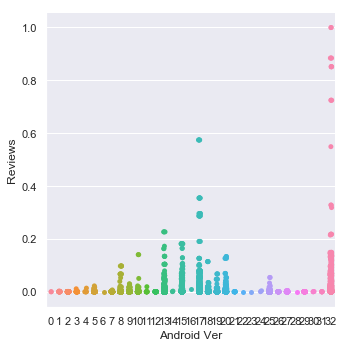

In [79]:
plt.figure(figsize=(45,10))
sns.catplot(x='Android Ver', y = 'Reviews', data=stand_df)

### Wniosek: du≈ºa ilo≈õƒá opinii charakterystyczna dla aplikacji, kt√≥re sƒÖ dostƒôpne dla pewnych wersji androida. 

### Jak sƒÖ powiƒÖzane Kategorie oraz Ilo≈õƒá opinii

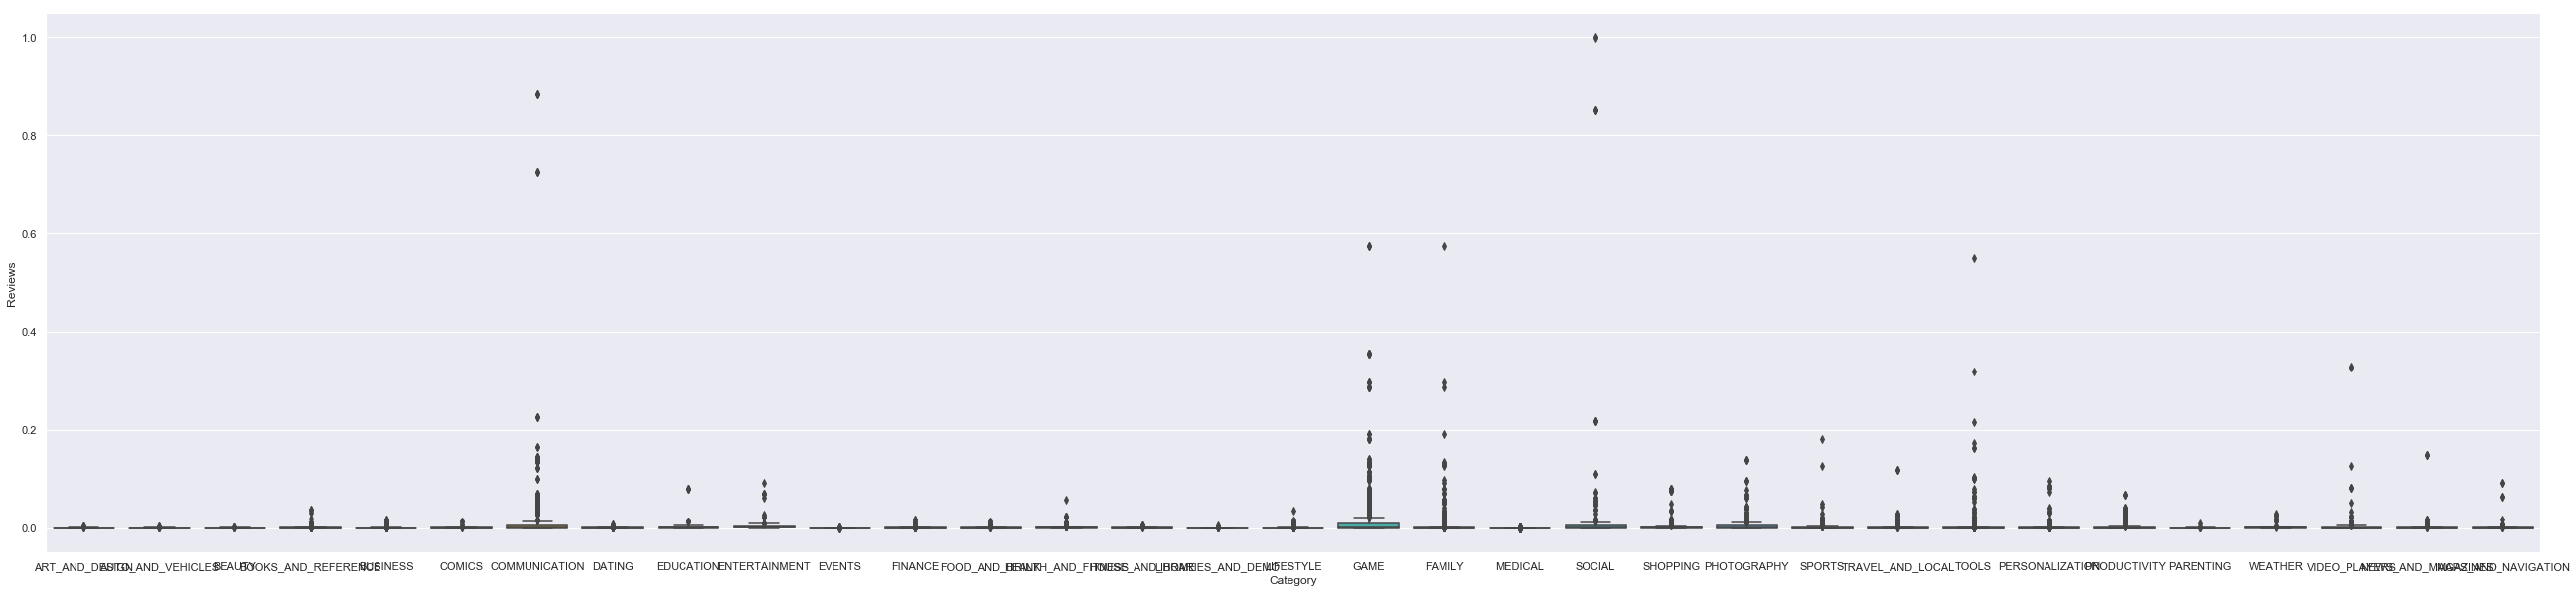

In [80]:
plt.figure(figsize=(45,10))
ax = sns.boxplot(x="Category", y="Reviews", data=stand_df)

### Jak widaƒá z boxplota, kilka zakres√≥w Reviews charakterystyczne tylko dla pewnych kategorii. 

## Badanie korelacji

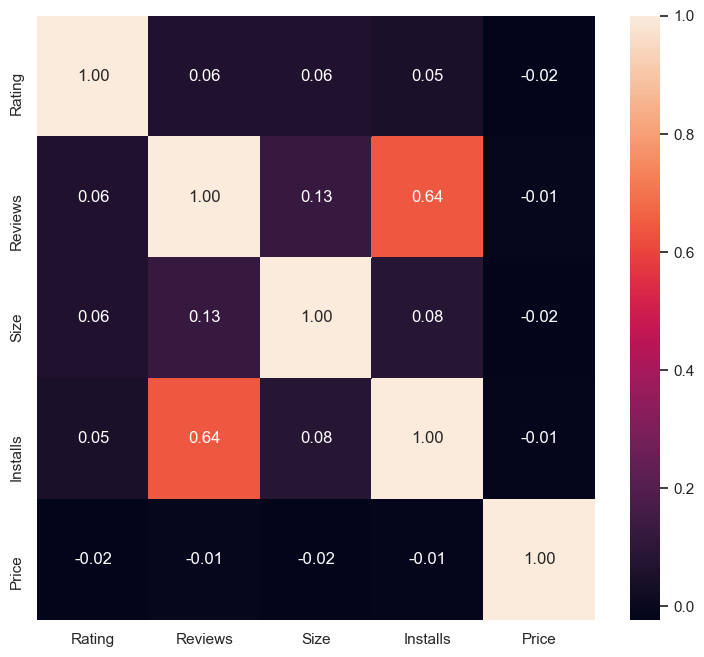

In [81]:
heat_atr=['Rating', 'Reviews', 'Size', 'Installs', 'Price']
plt.figure(figsize=(9,8), dpi = 100)
sns.heatmap(stand_df[heat_atr].corr(), annot=True, fmt='.2f')

### Wniosek: sƒÖ mocne skorelowane liczby instalacji i opinii. To wynika z tego, ≈ºe u≈ºytkownik zostawia opiniƒô dopiero po pobraniu aplikacji. Trochƒô sƒÖ skorelowane Opinie i Rozmiar. 

In [82]:
features = ['Android Ver', 'Genres', 'Content Rating' ]
min_max_scaler = MinMaxScaler()
column_names_to_normalize = features
x = stand_df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = stand_df.index)
stand_df[column_names_to_normalize] = df_temp

C:\Users\strai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Podsumowanie:
Po analizie zbioru danych uda≈Ço siƒô znale≈∫ƒá du≈ºo zale≈ºno≈õci pomiƒôdzy r√≥≈ºnymi cechami. Og√≥lne patrzyli≈õmy na cechy Rating oraz Reviews i ich zale≈ºno≈õci od innych. SƒÖ kilka parametr√≥w, kt√≥re majƒÖ wp≈Çyw na wysokƒÖ ocenƒô aplikacji, jednak nie uda≈Ço siƒô znale≈∫ƒá du≈ºo warunk√≥w, przy kt√≥rych aplikacja by≈Çaby nisko oceniania. Trochƒô lepiej jest sytuacja z Reviews ‚Äî uda≈Ço siƒô znale≈∫ƒá warunki, przy kt√≥rych aplikacja ma du≈ºo opinii, oraz przy kt√≥rych ma ma≈Ço. Z tego powodu wybieramy tƒô cechƒô dla badania regresji.

# Teza

**Teza**: Istnieje model regresji Liczby opinii bazujƒÖcy na cechach dostƒôpnych w opracowywanym zbiorze danych.

**Za≈Ço≈ºenia**: Macierz korelacji pokazuje nam, ≈ºe Reviews koreluje z cechƒÖ Installs. NajwiƒôkszƒÖ ilo≈õƒá opinii majƒÖ aplikacje o ≈õrednim rozmiarze, wysokiej ocenie. P≈Çatne aplikacje sƒÖ rzadko komentowane, niezale≈ºnie od ceny. Ma≈ÇƒÖ liczbƒô opinii majƒÖ aplikacje typu Adults Only oraz Unrated. Obs≈Çuga pewnych wersji androidu ma wp≈Çyw na liczbƒô opinii. Niekt√≥re zakresy dla Reviews sƒÖ charakterystyczne tylko dla pewnych kategorii.

**Wybor modelu**: Po wstƒôpnej analizie danych nie uda≈Ço siƒô znale≈∫ƒá dobrych liniowych zale≈ºno≈õci pomiƒôdzy cechami. Kolumna Price, mimo tego, ≈ºe posiada warto≈õci ciƒÖgle, jest trochƒô kategoryczna - dla bezp≈Çatnych aplikacji cena jest r√≥wna 0. Niekt√≥re kategorie mogƒÖ wyznaczyƒá nam zakres warto≈õci Reviews. W r√≥≈ºnych cechach sƒÖ kilka warto≈õci odstajƒÖcych. PodsumowujƒÖc to, zak≈Çadamy, ≈ºe liniowa regresja nie bƒôdzie dla nas skuteczna, i najlepiej bƒôdzie wykorzystaƒá las drzew decyzyjnych. 

# Model

In [83]:
features = ['Installs', 'Rating', 'Size', 'Type', 'Price', 'Content Rating', 'Genres', 'Android Ver']
features.extend(category_list)

In [84]:
X = stand_df[features]
y = stand_df['Reviews']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

## Regularyzacja oraz dob√≥r cech

### Sprawdzamy Lasso

In [85]:
from sklearn.linear_model import Lasso # using scikit-learn

In [86]:
lambdas = [0.001, 0.0001, 0.1, 0.4, 1, 2, 0.00001, 0.000001]
params = [
    {'alpha' : lambdas},
]

model = Lasso()
grid_search = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error',
                          return_train_score=True, cv=5)
grid_search.fit(X=X_train, y=y_train)
print(grid_search.best_estimator_)


Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [87]:
model_all = Lasso(alpha=0.000001, normalize=True) # set parameters
model_all.fit(X_train, y_train) # learn weights
model_all.coef_

array([ 2.56047090e-01,  7.65988771e-03,  1.10587992e-02,  1.13677014e-03,
        0.00000000e+00,  0.00000000e+00,  4.40459142e-03,  0.00000000e+00,
        4.39189521e-04,  2.67360422e-04,  0.00000000e+00,  0.00000000e+00,
        6.89393041e-04,  1.96746207e-04,  3.50438325e-03,  2.87021365e-04,
        4.87796757e-04, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -5.05334634e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  7.82232770e-03,  3.60248930e-05, -4.45854264e-04,
        1.06368348e-02,  4.05364357e-04, -3.77206156e-04, -1.14960503e-03,
       -6.21876070e-03, -4.19089750e-04,  7.43676129e-04, -6.53529903e-03,
       -5.01101020e-04, -1.03277256e-04, -3.42066100e-03, -4.73176942e-03,
        5.94844090e-04])

In [88]:
model_all.score(X_test, y_test)

0.49881950725437163

In [89]:
chosen = {}
for param, coef in zip(features, model_all.coef_):
    if coef > 0:
        chosen[param] = coef
features_use = sorted(chosen.items(), key=lambda x: x[1], reverse=True)
features_use

[('Installs', 0.25604709023844857),
 ('Size', 0.011058799188546917),
 ('cat_SOCIAL', 0.010636834755899358),
 ('cat_GAME', 0.007822327703784987),
 ('Rating', 0.007659887713089188),
 ('Genres', 0.004404591418746623),
 ('cat_COMMUNICATION', 0.0035043832542237204),
 ('Type', 0.0011367701376822402),
 ('cat_PERSONALIZATION', 0.0007436761290249863),
 ('cat_BUSINESS', 0.0006893930413375127),
 ('cat_MAPS_AND_NAVIGATION', 0.0005948440901532866),
 ('cat_EDUCATION', 0.00048779675745279014),
 ('cat_ART_AND_DESIGN', 0.00043918952144991253),
 ('cat_SHOPPING', 0.00040536435727418535),
 ('cat_DATING', 0.00028702136507330225),
 ('cat_AUTO_AND_VEHICLES', 0.00026736042169958044),
 ('cat_COMICS', 0.00019674620665180404),
 ('cat_FAMILY', 3.602489303277712e-05)]

Text(0, 0.5, 'Warto≈õci testowe')

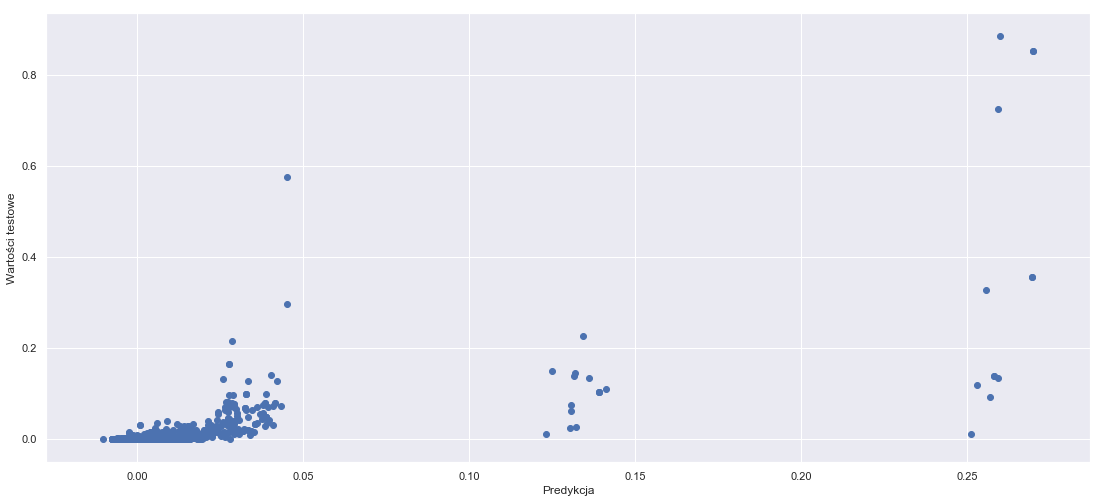

In [90]:
y_pred = model_all.predict(X_test)
plt.scatter(x=y_pred,  y=y_test)
plt.xlabel('Predykcja')
plt.ylabel('Warto≈õci testowe')

### Sprawdzamy Ridge

In [91]:
from sklearn.linear_model import Ridge
lambdas = [0.001, 0.0001, 0.1, 0.4]
params = [
    {'alpha' : lambdas},
]

model = Ridge()
grid_search = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error',
                          return_train_score=True, cv=5)
grid_search.fit(X=X_train, y=y_train)
print(grid_search.best_estimator_)

ridge = Ridge(alpha=0.4)
ridge.fit(X_train, y_train)
train_score=ridge.score(X_train,y_train)
test_score=ridge.score(X_test,y_test)
print("training score:", train_score) 
print("test score: ", test_score)
cechy = {}
for feature, coef in zip(list(X.columns), ridge.coef_):
        #print(f'Cecha: {feature},      Wsp√≥≈Çczynnik: {coef}')
    cechy[feature] = coef
    
features_use = sorted(cechy.items(), key=lambda x: x[1], reverse=True)
features_use

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
training score: 0.3995844670810033
test score:  0.4984648347160024


[('Installs', 0.25499376371385546),
 ('Size', 0.0109725169235652),
 ('cat_SOCIAL', 0.009896897486691448),
 ('cat_GAME', 0.00925845327655371),
 ('Genres', 0.008351550285973256),
 ('Rating', 0.008181049243916086),
 ('cat_COMMUNICATION', 0.004874065801721213),
 ('cat_ART_AND_DESIGN', 0.0032752228184759254),
 ('cat_BEAUTY', 0.00290368324584705),
 ('cat_AUTO_AND_VEHICLES', 0.0028360248968022695),
 ('Price', 0.002619006480206278),
 ('cat_BUSINESS', 0.002418693614607049),
 ('cat_COMICS', 0.0022920100081402764),
 ('cat_EDUCATION', 0.0018992576251727947),
 ('cat_DATING', 0.0017824485103382114),
 ('Type', 0.0015077156016504167),
 ('cat_BOOKS_AND_REFERENCE', 0.0015031399413855224),
 ('cat_MAPS_AND_NAVIGATION', 0.0010686052948125108),
 ('Android Ver', 0.0006807147034690325),
 ('cat_PERSONALIZATION', 0.0006750335920252516),
 ('cat_FAMILY', 0.0004795249811809688),
 ('cat_SHOPPING', -0.00022416275508486573),
 ('cat_LIBRARIES_AND_DEMO', -0.0002840902011463855),
 ('Content Rating', -0.00031445451758871

Text(0, 0.5, 'Warto≈õci testowe')

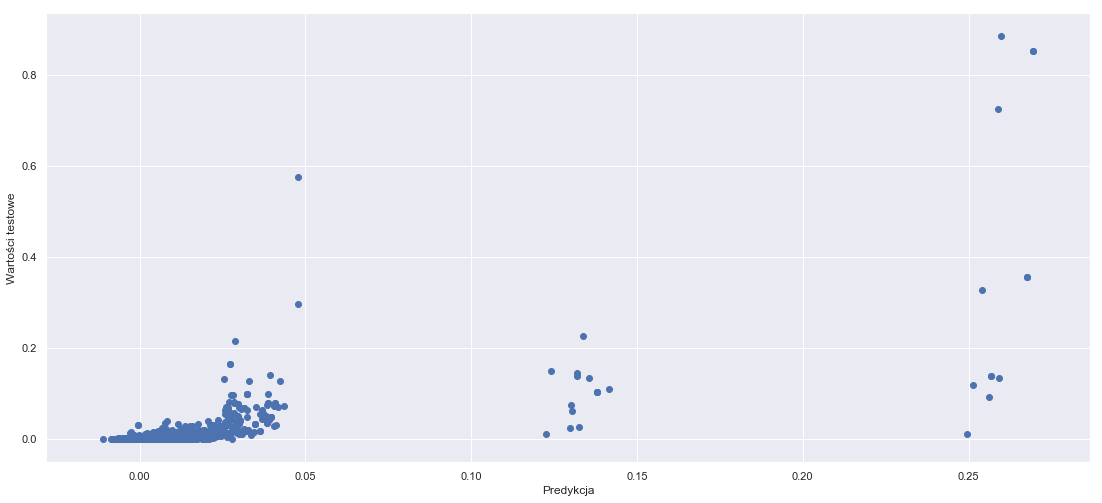

In [92]:
y_pred = ridge.predict(X_test)
plt.scatter(x=y_pred,  y=y_test)
plt.xlabel('Predykcja')
plt.ylabel('Warto≈õci testowe')

### Przejrzymy siƒô dok≈Çadnej wynikom 

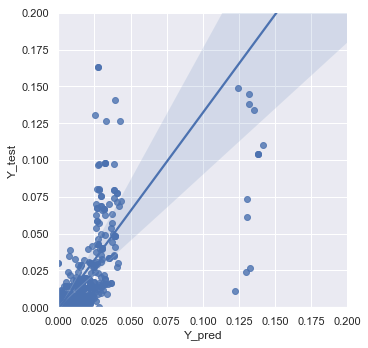

In [93]:
data = pd.DataFrame({'Y_pred' : list(y_pred), 'Y_test' : list(y_test)})
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)
g = g.set(xlim=(0,0.2),ylim=(0,0.2))

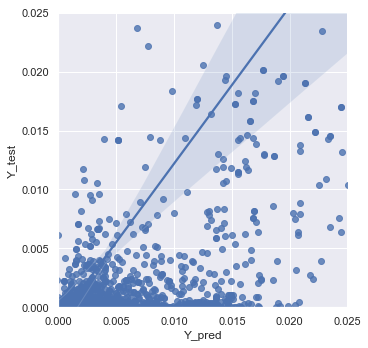

In [94]:
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)
g = g.set(xlim=(0,0.025),ylim=(0,0.025))

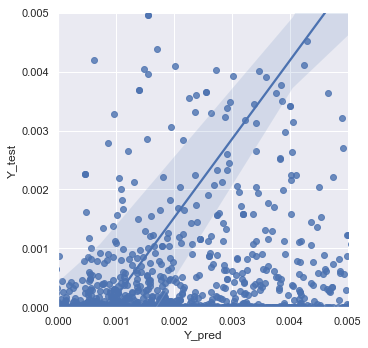

In [95]:
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)
g = g.set(xlim=(0,0.005),ylim=(0,0.005))

### Wniosek: Cechy, dobrane przez Ridge oraz Lasso nie bardzo siƒô r√≥≈ºniƒÖ: Najlepiej model opisujƒÖ Installs oraz Size, kt√≥re sƒÖ skorelowane z wyj≈õciem. Score dla Ridge oraz Lasso oznacza wsp√≥≈Çczynnik determinacji R^2 i im wiƒôkszy ten wsp√≥≈Çczynnik jest, tym lepiej model jest dopasowany do danych: jak widaƒá, regularyzacja liniowa nie jest skuteczna pod tym wzglƒôdem. Dob√≥r lambdy nie ma du≈ºego wp≈Çywu, wiƒôc problem nie jest w wariancji, wyj≈õcie jest ma≈Ço skorelowane z cechami.

### Sprawdzamy cechy, dobrane przez Drzewo decyzyjne

### Sklearn w drzewach decyzyjnych wykorzystuje algorytm CART, dla obliczenia feature_importances wykorzystuje wsp√≥≈Çczynnik Giniego.

In [116]:
from sklearn.tree import DecisionTreeRegressor
#criterion ‚Äúmae‚Äù for the mean absolute error, which minimizes the L1 loss using the median of each terminal node.
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [117]:
best_features = {}
for wsp, feat in zip(model.feature_importances_, features):
    best_features[feat] = wsp
features_use = sorted(best_features.items(), key=lambda x: x[1], reverse=True)
features_use

[('Installs', 0.464634186242156),
 ('Rating', 0.23558576604121087),
 ('cat_SOCIAL', 0.07816333335953664),
 ('Android Ver', 0.07774482287111986),
 ('Size', 0.0728632390921217),
 ('Genres', 0.055106493513320996),
 ('Content Rating', 0.008282293335533757),
 ('cat_PHOTOGRAPHY', 0.0037030454032933526),
 ('cat_COMMUNICATION', 0.0011351611338654693),
 ('cat_BOOKS_AND_REFERENCE', 0.0009409226734425925),
 ('cat_MAPS_AND_NAVIGATION', 0.0004469058796824447),
 ('cat_TOOLS', 0.00038056572232475575),
 ('cat_GAME', 0.00034659508048810966),
 ('cat_SHOPPING', 0.0002051825653640195),
 ('cat_PRODUCTIVITY', 0.00011423671091901781),
 ('cat_SPORTS', 9.337312794217312e-05),
 ('cat_FAMILY', 6.39178449410412e-05),
 ('cat_ENTERTAINMENT', 2.522781214449361e-05),
 ('cat_VIDEO_PLAYERS', 2.360992151648555e-05),
 ('cat_TRAVEL_AND_LOCAL', 2.189029465948908e-05),
 ('cat_NEWS_AND_MAGAZINES', 1.5899098774135485e-05),
 ('cat_PERSONALIZATION', 1.565954212528113e-05),
 ('cat_FOOD_AND_DRINK', 1.5186161094623621e-05),
 ('cat

## Zwykle drzewo decyzyjne za najlepsze cechy uwa≈ºa Installs, Size, Rating, Genres, Content Rating, Android Ver. 

sort_feat, values = zip(*features_use)
new_features = list(sort_feat[:4])
new_features

## Zach≈Çanny dob√≥r cech

In [98]:
def najlepsze_cechy2(n):
    reg = DecisionTreeRegressor()
    prev = []
    cechy = features.copy()
    for i in range(n):    
        cechy_testowe = {}
        best = {}    
        for i, value in enumerate(cechy):
            tmp = prev + [value]
            blad = cross_val_score(reg, X_train[tmp], y_train, cv=5, scoring="neg_mean_squared_error")
            rmse_cv_error = np.sqrt(sum(blad * -1) / 5)
            cechy_testowe[rmse_cv_error] = value
            
        if cechy_testowe:
            lowest_error = sorted(cechy_testowe.keys())[0]
            prev += [cechy_testowe[lowest_error]]
            best[lowest_error] = prev
            cechy.remove(cechy_testowe[lowest_error])
        
        
    return list(best.values()), list(best.keys())


for i in range(1,8):
    print(najlepsze_cechy2(i))

([['Installs']], [0.0284351474198038])
([['Installs', 'Genres']], [0.025310141021537853])
([['Installs', 'Genres', 'Rating']], [0.014045636228702791])
([['Installs', 'Genres', 'Rating', 'Type']], [0.014028316180634728])
([['Installs', 'Genres', 'Rating', 'Size', 'cat_HEALTH_AND_FITNESS']], [0.01303234504942601])
([['Installs', 'Genres', 'Rating', 'Type', 'Size', 'cat_DATING']], [0.013022947951985648])
([['Installs', 'Genres', 'Rating', 'cat_NEWS_AND_MAGAZINES', 'cat_FINANCE', 'Price', 'Size']], [0.013112765374871492])


### Po uruchomieniu dla r√≥znych warto≈õci treningowych/testowych najmniejszy b≈ÇƒÖd jest charakterystyczny dla cech Installs, Genres, Rating, Size oraz Price + cecha z kategorii, kt√≥ra siƒô r√≥≈ºni w zale≈ºno≈õci od rozbicia zbioru danych na testowy/treningowy. Og√≥lnie dla do≈õƒá ma≈Çego b≈Çƒôdu wystarczy cech Installs, Genres oraz Rating. 


In [99]:
new_features = ['Installs', 'Genres',  'Rating']

## Model regresji: Random Forest

#### Po wstƒôpnej analizie danych by≈Ço widaƒá, ≈ºe w naszym zbiorze mamy do≈õƒá du≈ºo r√≥≈ºnych warto≈õci odstajƒÖcych, wiƒôc nie zbƒôdnym bƒôdzie wykorzystaƒá las losowy, bo zwyk≈Çe drzewo decyzyjne mo≈ºe zostaƒá przeuczone

[(10, 0.8758429191387483),
 (20, 0.9067392176152531),
 (30, 0.8961634280494883),
 (40, 0.8965722720011458),
 (50, 0.9024082212945885),
 (60, 0.9071637438014579),
 (70, 0.9002622314287967),
 (80, 0.9113689827226142),
 (90, 0.9080788549200989),
 (100, 0.9096617173212974),
 (110, 0.9044132727204724),
 (120, 0.9133964803344532),
 (130, 0.9019204348340265),
 (140, 0.9050814328469861),
 (150, 0.9008959458057116),
 (160, 0.9010478501109898),
 (170, 0.9073191681084152),
 (180, 0.9052291408491411),
 (190, 0.906569704133898)]

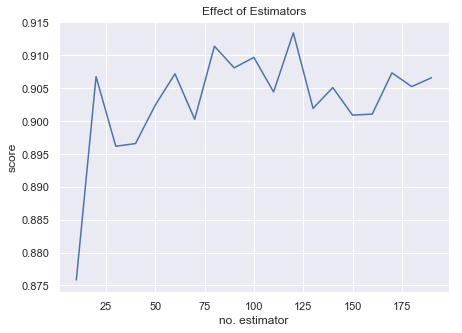

In [100]:
model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train[new_features], y_train)
    scores.append(model.score(X_test[new_features], y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results

#### Regresja dla wybranych cech:

In [101]:
model.set_params(n_estimators=50)
model.fit(X_train[new_features], y_train)
y_pred = model.predict(X_test[new_features])

In [102]:
model.score(X_test[new_features], y_test)

0.8952754527871792

<Figure size 1584x720 with 0 Axes>

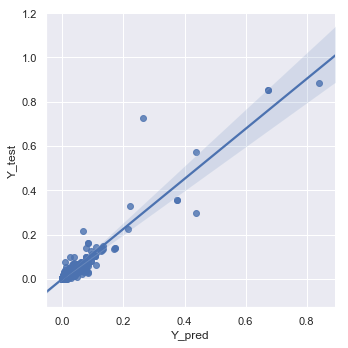

In [103]:
plt.figure(figsize=(22, 10))
data = pd.DataFrame({'Y_pred' : list(y_pred), 'Y_test' : list(y_test)})
sns.lmplot(x='Y_pred', y='Y_test', data=data)

### Tylko dla Installs

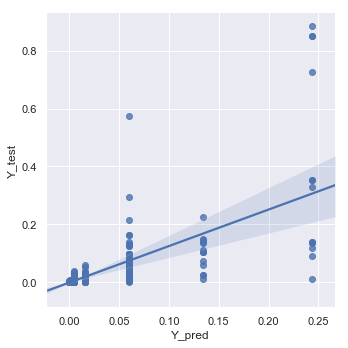

In [104]:
model.set_params(n_estimators=50)
model.fit(X_train[['Installs']], y_train)
y_pred = model.predict(X_test[['Installs']])
data = pd.DataFrame({'Y_pred' : list(y_pred), 'Y_test' : list(y_test)})
sns.lmplot(x='Y_pred', y='Y_test', data=data)

## Dla Installs, Genres

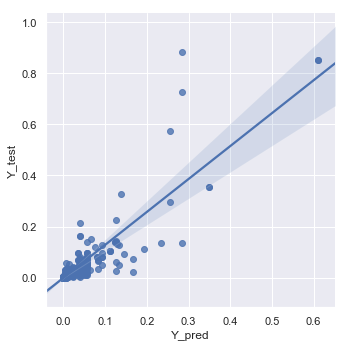

In [105]:
model.set_params(n_estimators=50)
model.fit(X_train[['Installs', 'Genres']], y_train)
y_pred = model.predict(X_test[['Installs', 'Genres']])
data = pd.DataFrame({'Y_pred' : list(y_pred), 'Y_test' : list(y_test)})
sns.lmplot(x='Y_pred', y='Y_test', data=data)

## Dla installs, Genres, Rating

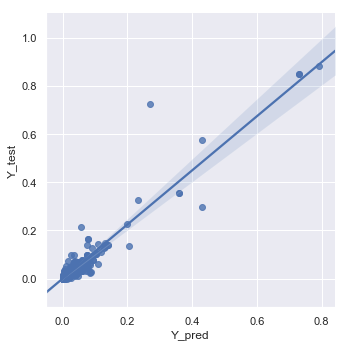

In [106]:
model.set_params(n_estimators=50)
model.fit(X_train[['Installs', 'Genres','Rating']], y_train)
y_pred = model.predict(X_test[['Installs', 'Genres','Rating']])
data = pd.DataFrame({'Y_pred' : list(y_pred), 'Y_test' : list(y_test)})
sns.lmplot(x='Y_pred', y='Y_test', data=data)

#### Regresja dla wszystkich cech:

In [107]:
model.set_params(n_estimators=125)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [108]:
model.score(X_test, y_test)

0.9276079501852784

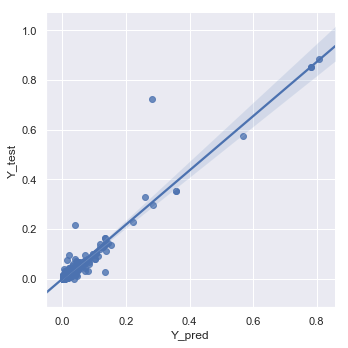

In [109]:
data = pd.DataFrame({'Y_pred' : list(y_pred), 'Y_test' : list(y_test)})
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)

#### Przejrzymy siƒô dok≈Çadniej wynikom

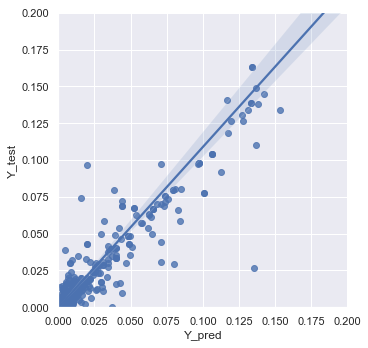

In [110]:
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)
g = g.set(xlim=(0,0.2),ylim=(0,0.2))

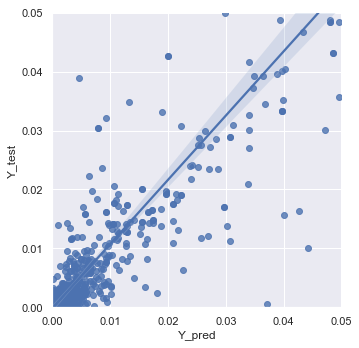

In [111]:
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)
g = g.set(xlim=(0,0.050),ylim=(0,0.050))

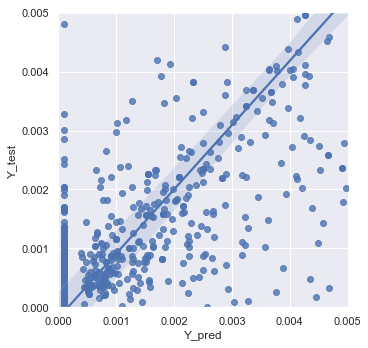

In [112]:
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)
g = g.set(xlim=(0,0.005),ylim=(0,0.005))

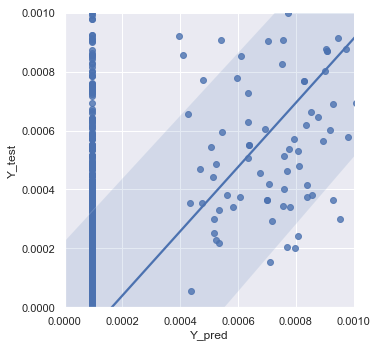

In [113]:
g = sns.lmplot(x='Y_pred', y='Y_test', data=data)
g = g.set(xlim=(0,0.001),ylim=(0,0.001))

## Wnioski ko≈Ñcowe:

Jak zak≈Çadali≈õmy, liniowa regresja nie okaza≈Ça siƒô bardzo skuteczna, pod tym wzg≈Çƒôdem, ≈ºe nie poradzi≈Ça z warto≈õciami du≈ºymi. 

Najlepszymi cechami okaza≈Çy siƒô Installs, Genres, Rating, Price, Size. Installs oraz Size sƒÖ skorelowane z wyj≈õciem, Rating oraz Price majƒÖ pewnie zale≈ºno≈õci, ale ciekawe, ≈ºe cecha Genres okaza≈Ça siƒô na tyle wa≈ºna, mimo tego, ≈ºe zawiera du≈ºo warto≈õci unikatowych. Przy sprawdzeniu dzia≈Çania lasu dla tylko jednej cechy Installs otrzymali≈õmy ten samy b≈ÇƒÖd, co dla regresji liniowej - drzewo nie radzi z warto≈õciami du≈ºymi. Dopiero po dodaniu cechy Genres uzyskali≈õmy dopasowanie do warto≈õci du≈ºych.

Regresor lasu losowego daje nam do≈õƒá dobry wynik. Ale, je≈õli popatrzyƒá na otrzymane warto≈õci, mo≈ºemy zauwa≈ºyƒá, ≈ºe ma≈Çy b≈ÇƒÖd mo≈ºe byƒá spowodowany zakresom danych - po standaryzacji wiƒôkszo≈õƒá warto≈õci siƒô okaza≈Ça w zakresie 0.0 - 0.2. UwzglƒôdniajƒÖc to, ≈ºe najwiƒôksza warto≈õƒá jest rzƒôdu 7^7, a najmniejsza - 0, to b≈ÇƒÖd w 0.001 oznacza rozbie≈ºno≈õƒá w warto≈õci 10.000. Regresor ma problem z bardzo ma≈Çymy warto≈õciami do 10.000. Z drugiej strony, "Ilo≈õƒá opinii" jest cechƒÖ, gdzie bardziej liczy siƒô rzƒÖd warto≈õci, ni≈º dok≈Çadna jej warto≈õƒá. Regresor lasu losowego mniej wiƒôcej poradzi≈Ç z du≈ºymi warto≈õciami, co nie da≈Ço siƒô osiƒÖgnƒÖƒá przy regresji liniowej. Z tego powodu liczymy, ≈ºe nasz regresor odpowiada naszym celom.